In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import pandas as pd

In [2]:
df = pd.read_csv("Sleep_disorder_data.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# 1. Understand the data

1. View the head, tail and samples
2. check the data types of each columns --> df.info()
3. Check the rows and columns.
4. We check the 

In [5]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [7]:
df.sample(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
220,221,Female,44,Teacher,6.6,7,45,4,Overweight,135/90,65,6000,Insomnia
325,326,Female,53,Engineer,8.5,9,30,3,Normal,125/80,65,5000,NaN
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
171,172,Male,41,Lawyer,7.7,8,90,5,Normal,130/85,70,8000,NaN
24,25,Male,30,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [9]:
df.shape

(374, 13)

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


## 2. Data Cleaning.

Check the missing values

In [13]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [14]:
df["Sleep Disorder"].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [15]:
# Change the nan --> "None"
df["Sleep Disorder"].fillna("None", inplace = True)

In [16]:
df["Sleep Disorder"].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [17]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [18]:
df["Person ID"].duplicated().sum()

0

In [19]:
for col in df.columns:
    df[col].value_counts()
    # print("=" * 25)

In [20]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [21]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print("=" * 25)

Person ID
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 

In [22]:
for col in df.select_dtypes(include = "object").columns:
    print(col)
    print(df[col].unique())
    print("=" * 25)

Gender
['Male' 'Female']
Occupation
['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
BMI Category
['Overweight' 'Normal' 'Obese' 'Normal Weight']
Blood Pressure
['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']
Sleep Disorder
['None' 'Sleep Apnea' 'Insomnia']


In [23]:
df["BMI Category"].replace("Normal", "Normal Weight", inplace = True)

In [24]:
df["BMI Category"].unique()

array(['Overweight', 'Normal Weight', 'Obese'], dtype=object)

# EDA Exploratory Data Analysis


In [26]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Mean Arterial Pressure (MAP) is an average of blood pressure over one complete heart cycle, and it's a crucial indicator of tissue perfusion. It can be estimated using the formula: MAP ≈ Diastolic BP + 1/3 (Systolic BP - Diastolic BP), or more simply: MAP ≈ (2 * Diastolic BP + Systolic BP) / 3. For a typical blood pressure of 120/80 mmHg, the MAP is approximately 93 mmHg.

In [28]:
 # copying the data here
temp = df.copy()                                 
# generate 2 new columns with the help of blood pressure column
temp[["Systolic", "Diastolic"]] = temp["Blood Pressure"].str.split("/", expand = True).astype(int) 
temp["Map"] = (2* temp["Diastolic"] + temp["Systolic"]) / 3
temp["Map"] = temp["Map"].astype(int)
temp = temp[["Person ID","Map","Systolic", "Diastolic"]]
df1 = pd.merge(df, temp, on= "Person ID")
df1

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Map,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,97,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,None,95,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,None,95,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,106,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,106,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,110,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,110,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,110,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,110,140,95


In [29]:
df = df1.copy() 
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Map,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,97,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,None,95,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,None,95,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,106,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,106,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,110,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,110,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,110,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,110,140,95


In [30]:
a = df.head()

# EDA Performe

> # Here i make a list which contains all the Numberics data columns

In [33]:
int_col = []
# in this, I added all the columsn
for i in df.select_dtypes(include = "number").columns:
    int_col.append(i)
int_col.pop(0)         # remove personal id col
print(int_col)

['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Map', 'Systolic', 'Diastolic']


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
 13  Map                      374 non-null    int32  
 14  Systolic                 3

1. Sleep Disorder VS Int_col > Mean 
> Then i will remove useless columns

2. Sleep Disorder VS 

In [36]:
for col in int_col:
    print(col)
    print(df.groupby(["Sleep Disorder", "Gender"]).agg({col : "mean"}))
    print("="* 25)
    print()

Age
                             Age
Sleep Disorder Gender           
Insomnia       Female  44.944444
               Male    42.268293
None           Female  44.926829
               Male    35.510949
Sleep Apnea    Female  51.761194
               Male    37.181818

Sleep Duration
                       Sleep Duration
Sleep Disorder Gender                
Insomnia       Female        6.633333
               Male          6.551220
None           Female        7.650000
               Male          7.183942
Sleep Apnea    Female        7.035821
               Male          7.009091

Quality of Sleep
                       Quality of Sleep
Sleep Disorder Gender                  
Insomnia       Female          6.944444
               Male            6.170732
None           Female          8.280488
               Male            7.233577
Sleep Apnea    Female          7.298507
               Male            6.636364

Physical Activity Level
                       Physical Activity Level
Sl

In [37]:
df.groupby("Sleep Disorder").agg({"Age" : "mean"}) 

,Age
Sleep Disorder,
Insomnia,43.519481
None,39.036530
Sleep Apnea,49.705128


In [38]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Map,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,97,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,None,95,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,None,95,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,106,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,106,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,110,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,110,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,110,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,110,140,95


In [39]:
#df.to_csv("Cleaned_BSleep.csv")

# step 1: Divide data into Qualitative and Quantitative 

In [41]:
qualitative_col = []
for i in df.select_dtypes("object").columns:
    qualitative_col.append(i)
qualitative_col

['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']

In [42]:
qualitative_col.remove('Blood Pressure')          #It is given in `122/92 type of format
qualitative_col.remove("Sleep Disorder")          # Its the given data which we are going to compare
qualitative_col

['Gender', 'Occupation', 'BMI Category']

In [43]:
quantitative_col = []
for i in df.select_dtypes("number").columns:
    quantitative_col.append(i)
quantitative_col

['Person ID',
 'Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps',
 'Map',
 'Systolic',
 'Diastolic']

In [44]:
quantitative_col.remove('Person ID')            # Its of no use
quantitative_col.remove('Quality of Sleep')     # ITs an qualitative ordial value
quantitative_col.remove('Stress Level')         # ITs an qualitative ordial value

In [45]:
qualitative_col.extend(['Quality of Sleep','Stress Level'])
qualitative_col

['Gender', 'Occupation', 'BMI Category', 'Quality of Sleep', 'Stress Level']

In [46]:

for col in df.columns:
    print(col)
    print(df[col].unique()," > ", df[col].nunique() )
    print("=" * 25)

Person ID
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 

In [47]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Map,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,97,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,None,95,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,None,95,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,106,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,106,140,90


In [48]:
for i in df.columns:
    print(i, "\n")

Person ID 

Gender 

Age 

Occupation 

Sleep Duration 

Quality of Sleep 

Physical Activity Level 

Stress Level 

BMI Category 

Blood Pressure 

Heart Rate 

Daily Steps 

Sleep Disorder 

Map 

Systolic 

Diastolic 



# Step 3: divede qualitative and quantitaive into discrete,contineous, ordinal and nominal

In [50]:
nominal = ["Gender", "Occupation", "Sleep Disorder", "BMI Category"]

ordinal = ["Quality of Sleep", "Stress Level", "BMI Category"]

discrete = ["Daily Steps", "Physical Activity Level"]

continuous = ["Age", "Sleep Duration", "Map", "Systolic", "Diastolic", "Heart Rate"]

len_nominal = len(nominal)
# len_ordinal = len(ordinal)
# len_discrete = len(discrete)
# len_continuous = len(continuous)

# Step 4: Make the graps for all 

> ## Nominal vs Nominal

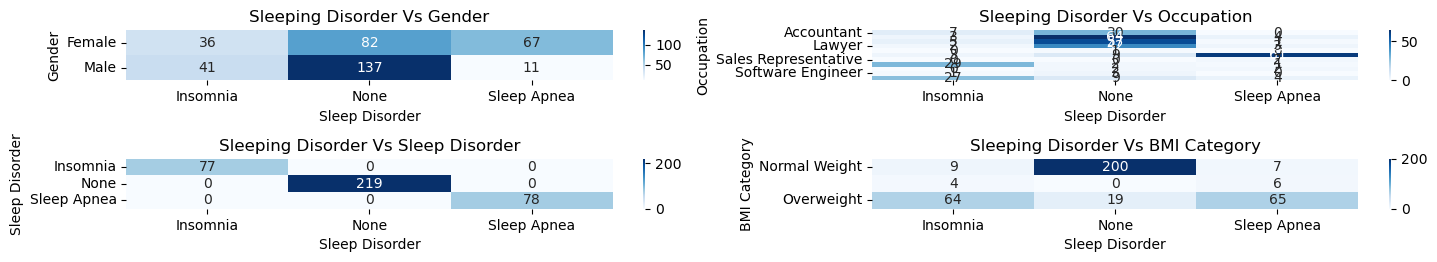

In [53]:
# nominal = ["Gender", "Occupation"]
import math
i = 0
y = nominal
n = len(nominal)
total = math.ceil(len_nominal * n /2)
plot_index = 1
plt.figure(figsize = (15,10))
while( plot_index <(n*2)):
    if i >= n:
        break
    plt.subplot(total, 2, plot_index)
    cross_table = pd.crosstab(df[y[i]], df["Sleep Disorder"] , )
    sns.heatmap(cross_table, annot= True, fmt= "d", cmap= "Blues")
    plt.title(f"Sleeping Disorder Vs {y[i]}")
    plot_index += 1
    i += 1
    plt.tight_layout()


> ## Nominal vs Ordinal

IndexError: list index out of range

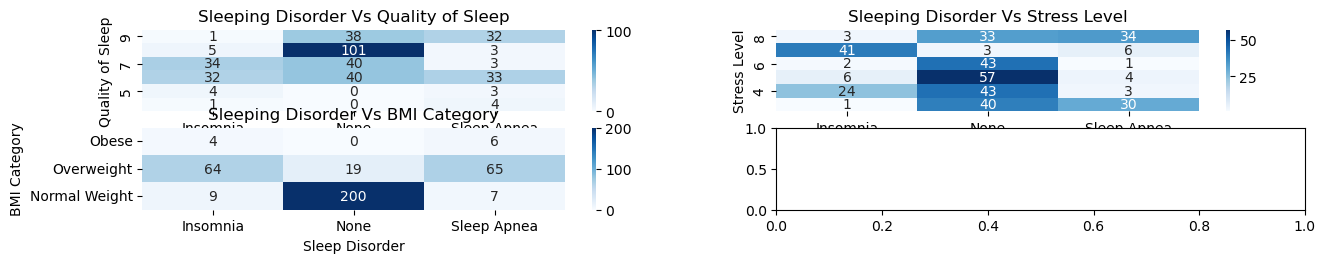

In [55]:
# ordinal = ["Quality of Sleep", "Stress Level", "BMI Category"]
df["Quality of Sleep"] = pd.Categorical(df["Quality of Sleep"], categories= sorted(df["Quality of Sleep"].unique(),reverse=True ), ordered= True)
df["Stress Level"] = pd.Categorical(df["Stress Level"], categories= sorted(df["Stress Level"].unique(),reverse=True ), ordered= True)
df["BMI Category"] = pd.Categorical(df["BMI Category"], categories= ['Obese', 'Overweight', 'Normal Weight'], ordered= True)

i = 0
y = ordinal
n = len(nominal)
total = math.ceil(len_nominal * n /2)
plot_index = 1
plt.figure(figsize = (15,10))
while( plot_index <(n*2)):
    # if i >= n:
    #     break
    plt.subplot(total, 2, plot_index)
    cross_table = pd.crosstab(df[y[i]], df["Sleep Disorder"])
    sns.heatmap(cross_table, annot= True, fmt= "d", cmap= "Blues")
    plt.title(f"Sleeping Disorder Vs {y[i]}")
    plot_index += 1
    i += 1
plt.tight_layout()


> ## Nominal vs Discrete

In [ ]:
# discrete = ["Daily Steps", "Physical Activity Level]
import matplotlib.cm as cm
i = 0
y = discrete
n = len(y)
total = math.ceil(len_nominal * n /2)
plot_index = 1
# colors = cm.get_cmap("coolwarm", len(df["Sleep Disorder"]))
plt.figure(figsize = (15,10))
while( plot_index < (n*2)):
    if i >= n:
        break
    plt.subplot(total, 2, plot_index)
    # cross_table = pd.crosstab(df[y[i]], df["Sleep Disorder"] , )
    # sns.heatmap(cross_table, annot= True, fmt= "d", cmap= "Blues")
    # colours = colors(i)
    sns.barplot(x = df["Sleep Disorder"],y =  df[y[i]], estimator='mean',errorbar= None, hue= df["Occupation"] , palette="light:skyBlue", zorder = 3)
    # plt.bar(df["Sleep Disorder"], df[y[i]].mean())
    plt.grid(axis= "y", color = "black", zorder = 0)
    plt.title(f"Sleeping Disorder Vs {y[i]}")
    plot_index += 1
    i += 1
    plt.tight_layout()
plt.show()


> ## Nominal vs Contineous

In [ ]:
# discrete = ["Daily Steps", "Physical Activity Level","Blood Pressure"]
import matplotlib.cm as cm
i = 0
y = continuous
n = len(y)
total = math.ceil(len_nominal * n /2)
plot_index = 1
plt.figure(figsize = (15,20))
# colors = cm.get_cmap("coolwarm", len(df["Sleep Disorder"]))
while( plot_index < (n*2)):
    if i >= n:
        break
    plt.subplot(total, 2, plot_index)
    # cross_table = pd.crosstab(df[y[i]], df["Sleep Disorder"] , )
    # sns.heatmap(cross_table, annot= True, fmt= "d", cmap= "Blues")
    # colours = colors(i)
    sns.barplot(x = df["Sleep Disorder"],y =  df[y[i]] , color="skyBlue",errorbar= None, zorder = 3 )
    # plt.bar(df["Sleep Disorder"], df[y[i]].mean())
    plt.grid(axis= "y", color = "black", zorder = 0)
    plt.title(f"Sleeping Disorder Vs {y[i]}")
    plot_index += 1
    i += 1
    plt.tight_layout()
plt.show()


In [ ]:
df.head()

In [ ]:
df["Quality of Sleep"] = pd.Categorical(df["Quality of Sleep"], categories= sorted(df["Quality of Sleep"].unique(),reverse=True ), ordered= True)
df["Quality of Sleep"]

In [ ]:
a

In [ ]:
# discrete = ["Daily Steps", "Physical Activity Level]
import matplotlib.cm as cm
i = 0
y = discrete
n = len(y)
total = math.ceil(len_nominal * n /2)
plot_index = 1
# colors = cm.get_cmap("coolwarm", len(df["Sleep Disorder"]))
while( plot_index < (n*2)):
    plt.figure(figsize = (20,10))
    if i >= n:
        break
    plt.subplot(total, 2, plot_index)
    # cross_table = pd.crosstab(df[y[i]], df["Sleep Disorder"] , )
    # sns.heatmap(cross_table, annot= True, fmt= "d", cmap= "Blues")
    # colours = colors(i)
    sns.barplot(x = df["Sleep Disorder"],y =  df[y[i]], estimator='mean',errorbar= None, hue= df["Occupation"] , palette="light:skyBlue", zorder = 3)
    # plt.bar(df["Sleep Disorder"], df[y[i]].mean())
    plt.grid(axis= "y", color = "black", zorder = 0)
    plt.title(f"Sleeping Disorder Vs {y[i]}")
    plot_index += 1
    i += 1
    plt.tight_layout()
    plt.show()


In [ ]:
# df.groupby(["Sleep Disorder", "Occupation"]).agg(top_3 = ("Physical Activity Level" , "mean")).reset_index().set_index(["Sleep Disorder", "Occupation"], drop = True).nlargest(3,["Sleep Disorder", "Occupation"])

In [ ]:
top_df = (
df.groupby(["Sleep Disorder", "Occupation"])
.agg(top_3 = ("Physical Activity Level" , "mean"))
.sort_values(["Sleep Disorder", "top_3"], ascending= False)
.groupby("Sleep Disorder")
.head(3)
.reset_index()
)

In [ ]:
top_df

In [ ]:
plt.legend(top_df["Occupation"])
sns.barplot(x = top_df["Sleep Disorder"], y = top_df["top_3"],hue = top_df["Occupation"],  legend= None, errorbar= None, palette= "light:red")
plt.show()


In [ ]:
# discrete = ["Daily Steps", "Physical Activity Level","Blood Pressure"]
al = ["Quality of Sleep", "Stress Level", "Daily Steps", "Physical Activity Level","Age", "Sleep Duration", "Map", "Systolic", "Diastolic", "Heart Rate"]
import matplotlib.cm as cm
i = 0
y = al
n = len(y)
total = math.ceil(len_nominal * n /2)
plot_index = 1
# colors = cm.get_cmap("coolwarm", len(df["Sleep Disorder"]))
plt.figure(figsize = (10,30))
while( plot_index < (n*2)):
    if i >= n:
        break
    plt.subplot(total, 2, plot_index)
    # cross_table = pd.crosstab(df[y[i]], df["Sleep Disorder"] , )
    # sns.heatmap(cross_table, annot= True, fmt= "d", cmap= "Blues")
    # colours = colors(i)
    sns.barplot(x = df["Sleep Disorder"],y =  df[y[i]] , color="skyBlue",errorbar= None, zorder = 3 )
    # plt.bar(df["Sleep Disorder"], df[y[i]].mean())
    plt.grid(axis= "y", color = "black", zorder = 0)
    plt.title(f"Sleeping Disorder Vs {y[i]}")
    plot_index += 1
    i += 1
    plt.tight_layout()


In [ ]:
# discrete = ["Daily Steps", "Physical Activity Level","Blood Pressure"]
al = ["Quality of Sleep", "Stress Level", "Daily Steps", "Physical Activity Level","Age", "Sleep Duration", "Map", "Systolic", "Diastolic", "Heart Rate"]
import matplotlib.cm as cm
i = 0
y = al
n = len(y)
total = math.ceil(len_nominal * n /2)
plot_index = 1
# colors = cm.get_cmap("coolwarm", len(df["Sleep Disorder"]))
plt.figure(figsize = (10,30))
while( plot_index < (n*2)):
    if i >= n:
        break
    plt.subplot(total, 2, plot_index)
    # cross_table = pd.crosstab(df[y[i]], df["Sleep Disorder"] , )
    # sns.heatmap(cross_table, annot= True, fmt= "d", cmap= "Blues")
    # colours = colors(i)
    sns.barplot(x = df["Gender"],y =  df[y[i]] , color="skyBlue",errorbar= None, zorder = 3 )
    # plt.bar(df["Sleep Disorder"], df[y[i]].mean())
    plt.grid(axis= "y", color = "black", zorder = 0)
    plt.title(f"Gender Vs {y[i]}")
    plot_index += 1
    i += 1
    plt.tight_layout()


In [ ]:
# discrete = ["Daily Steps", "Physical Activity Level","Blood Pressure"]
def check(coly):
    
    al = ["Quality of Sleep", "Stress Level", "Daily Steps", "Physical Activity Level","Age", "Sleep Duration", "Map", "Systolic", "Diastolic", "Heart Rate"]
    import matplotlib.cm as cm
    i = 0
    y = al
    n = len(y)
    total = math.ceil(len_nominal * n /2)
    plot_index = 1
    # colors = cm.get_cmap("coolwarm", len(df["Sleep Disorder"]))
    plt.figure(figsize = (10,30))
    while( plot_index < (n*2)):
        if i >= n:
            break
        plt.subplot(total, 2, plot_index)
        # cross_table = pd.crosstab(df[y[i]], df["Sleep Disorder"] , )
        # sns.heatmap(cross_table, annot= True, fmt= "d", cmap= "Blues")
        # colours = colors(i)
        sns.barplot(x = df[coly],y =  df[y[i]] , color="skyBlue",errorbar= None, zorder = 3 )
        # plt.bar(df["Sleep Disorder"], df[y[i]].mean())
        plt.grid(axis= "y", color = "black", zorder = 0)
        plt.title(f"{coly} Vs {y[i]}")
        plot_index += 1
        i += 1
        plt.tight_layout()


In [ ]:
nominal = ["Gender", "Occupation", "Sleep Disorder", "BMI Category"]
for i in nominal:
    check(i)

In [ ]:
# discrete = ["Daily Steps", "Physical Activity Level","Blood Pressure"]
def check2(coly):
    
    al = ["Quality of Sleep", "Stress Level", "Daily Steps", "Physical Activity Level","Age", "Sleep Duration", "Map", "Systolic", "Diastolic", "Heart Rate"]
    import matplotlib.cm as cm
    i = 0
    y = al
    n = len(y)
    total = math.ceil(len_nominal * n /2)
    plot_index = 1
    # colors = cm.get_cmap("coolwarm", len(df["Sleep Disorder"]))
    plt.figure(figsize = (10,30))
    while( plot_index < (n*2)):
        if i >= n:
            break
        plt.subplot(total, 2, plot_index)
        # cross_table = pd.crosstab(df[y[i]], df["Sleep Disorder"] , )
        # sns.heatmap(cross_table, annot= True, fmt= "d", cmap= "Blues")
        # colours = colors(i)
        sns.barplot(x =  df["Sleep Disorder"] ,y =  df[y[i]], hue = df[coly], palette="dark:skyBlue",errorbar= None, zorder = 3 )
        # plt.bar(df["Sleep Disorder"], df[y[i]].mean())
        plt.grid(axis= "y", color = "black", zorder = 0)
        plt.title(f"Sleep Disorder and {coly} Vs {y[i]}")
        plot_index += 1
        i += 1
        plt.tight_layout()


In [ ]:
for i in nominal:
    check2(i)

In [ ]:
# discrete = ["Daily Steps", "Physical Activity Level","Blood Pressure"]
def check2(coly):
    
    al = ["Quality of Sleep", "Stress Level", "Daily Steps", "Physical Activity Level","Age", "Sleep Duration", "Map", "Systolic", "Diastolic", "Heart Rate"]
    import matplotlib.cm as cm
    i = 0
    y = al
    n = len(y)
    total = math.ceil(len_nominal * n /2)
    plot_index = 1
    # colors = cm.get_cmap("coolwarm", len(df["Sleep Disorder"]))
    plt.figure(figsize = (10,30))
    while( plot_index < (n*2)):
        if i >= n:
            break
        plt.subplot(total, 2, plot_index)
        # cross_table = pd.crosstab(df[y[i]], df["Sleep Disorder"] , )
        # sns.heatmap(cross_table, annot= True, fmt= "d", cmap= "Blues")
        # colours = colors(i)
        sns.barplot(x =  df["Gender"] ,y =  df[y[i]], hue = df[coly], palette="dark:skyBlue",errorbar= None, zorder = 3 )
        # plt.bar(df["Sleep Disorder"], df[y[i]].mean())
        plt.grid(axis= "y", color = "black", zorder = 0)
        plt.title(f"Gender and {coly} Vs {y[i]}")
        plot_index += 1
        i += 1
        plt.tight_layout()

for i in nominal:
    check2(i)

In [58]:
df.to_csv("abc.csv")